# Lesson 2: PyTorch for the Impatient

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jonathandinu/programming-generative-ai/blob/main/notebooks/02-pytorch-for-the-impatient.ipynb) [![GitHub Repo stars](https://img.shields.io/github/stars/jonathandinu/programming-generative-ai?style=social)](https://github.com/jonathandinu/programming-generative-ai)

> Colab for interactive execution in your browser (no setup) and repository for notebook index and additional resources (slides, etc.)

## 2.5 Tensors in PyTorch

In [1]:
import torch

In [2]:
x = torch.arange(600)

In [3]:
x.shape

torch.Size([600])

In [4]:
x.reshape((3, 4, 5, 10)).shape

torch.Size([3, 4, 5, 10])

In [5]:
x.shape

torch.Size([600])

In [6]:
print(f"x is a rank {len(x.shape)} tensor.")

x is a rank 1 tensor.


In [7]:
y = x.reshape((3, 4, 5, 10))
y.shape

torch.Size([3, 4, 5, 10])

In [8]:
print(f"y is a rank {len(y.shape)} tensor.")

y is a rank 4 tensor.


In [9]:
y.numpy().shape

(3, 4, 5, 10)

## 2.8 Effortless Backpropagation with `torch.autograd`

In [10]:
x = torch.arange(0, 1, step=0.1, requires_grad=True)

In [11]:
x

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000], requires_grad=True)

In [12]:
y = 3 * x**2 + 2 * x # derivative = 6x + 2

In [13]:
y

tensor([0.0000, 0.2300, 0.5200, 0.8700, 1.2800, 1.7500, 2.2800, 2.8700, 3.5200,
        4.2300], grad_fn=<AddBackward0>)

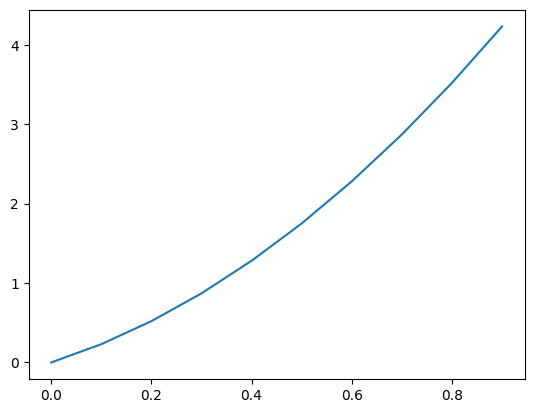

In [14]:
import matplotlib.pyplot as plt

plt.plot(x.detach().numpy(), y.detach().numpy())

In [15]:
y.backward(gradient=torch.ones(10))

In [16]:
assert torch.all(6 * x + 2 == x.grad)

In [17]:
x.grad

tensor([2.0000, 2.6000, 3.2000, 3.8000, 4.4000, 5.0000, 5.6000, 6.2000, 6.8000,
        7.4000])

In [18]:
x

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000], requires_grad=True)

In [19]:
x = torch.tensor([5.3], requires_grad=True)

In [20]:
for _ in range(5):
    # the `grad` attribute is initialized to `None`
    print(x.grad)

    # each call to `backward()` adds to existing stored gradients
    y = 3 * x**2 + 2 * x
    y.backward()

None
tensor([33.8000])
tensor([67.6000])
tensor([101.4000])
tensor([135.2000])


In [21]:
x.grad.zero_()

tensor([0.])

## 2.10 Working with Devices

In [22]:
torch.cuda.is_available()

True

In [23]:
x.device

device(type='cpu')

In [24]:
x.to('cuda')

tensor([5.3000], device='cuda:0', grad_fn=<ToCopyBackward0>)

In [25]:
x.to('cuda') + torch.arange(10, device='cuda')

tensor([ 5.3000,  6.3000,  7.3000,  8.3000,  9.3000, 10.3000, 11.3000, 12.3000,
        13.3000, 14.3000], device='cuda:0', grad_fn=<AddBackward0>)

In [26]:
x_gpu = x.to('cuda')

In [27]:
x_gpu

tensor([5.3000], device='cuda:0', grad_fn=<ToCopyBackward0>)

In [28]:
x_gpu.cpu().detach().numpy()

array([5.3], dtype=float32)

In [29]:
torch.set_default_device('cuda')

In [30]:
torch.arange(10, device='cuda')

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], device='cuda:0')

## 2.15 Linear Regression with PyTorch

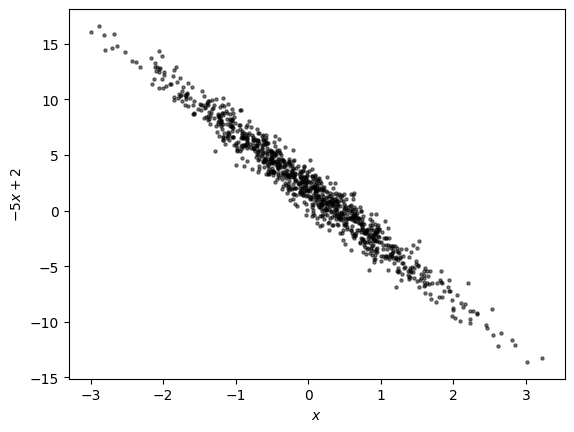

In [31]:
import matplotlib.pyplot as plt

n_points = 1000

# generate normally distributed x values
x = torch.randn((n_points, 1))

# generate y values with normally distributed error
y = -5 * x + 2 + torch.randn(n_points, 1)

plt.xlabel('$x$')
plt.ylabel('$-5x + 2$')

# if using the GPU, move tensors to CPU to plot
plt.scatter(x.cpu(), y.cpu(), s=5, c='black', alpha=0.5)
# plt.plot(x.cpu(), (-5 * x + 2).cpu(), c='#CC79A7');

In [32]:
device = 'cuda'

w = torch.normal(mean=0, std=0.01, size=(1,), requires_grad=True, device=device)
b = torch.zeros((1,), requires_grad=True, device=device)

# our hypothesis function
# h = SomeNeuralNetwork()
h = lambda x: w * x + b

In [33]:
w

tensor([0.0148], device='cuda:0', requires_grad=True)

In [34]:
b

tensor([0.], device='cuda:0', requires_grad=True)

In [35]:
# loss function for an individual data point
se = lambda y_hat, y: (y_hat - y) ** 2

In [36]:
import numpy as np

n_iter = 100
lr = 0.01
batch_size = 4

for _ in range(n_iter):
  # single iteration of SGD
  indexes = np.random.permutation(len(x))[:batch_size]
  loss = se(h(x[indexes]), y[indexes]).mean()
  loss.backward()

  with torch.no_grad():
    w -= w.grad * lr
    b -= b.grad * lr

    w.grad.zero_()
    b.grad.zero_()

In [37]:
w[0]

tensor(-4.3922, device='cuda:0', grad_fn=<SelectBackward0>)

In [38]:
b[0]

tensor(1.7255, device='cuda:0', grad_fn=<SelectBackward0>)

## 2.17 Layers and Activations with `torch.nn`

In [39]:
h = lambda x: w * x + b

In [40]:
from torch import nn

In [41]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()

    self.func = nn.Linear(1, 1)

  def forward(self, x):
    return self.func(x)

clf = LinearRegression()
clf

LinearRegression(
  (func): Linear(in_features=1, out_features=1, bias=True)
)

In [42]:
clf(x[0])

tensor([1.0016], device='cuda:0', grad_fn=<ViewBackward0>)

In [43]:
class Perceptron(nn.Module):
  def __init__(self):
    super().__init__()

    self.func = nn.Linear(1, 1)
    self.activation = nn.Sigmoid()

  def forward(self, x):
    return self.activation(self.func(x))

clf = Perceptron()
clf

Perceptron(
  (func): Linear(in_features=1, out_features=1, bias=True)
  (activation): Sigmoid()
)

In [44]:
clf(x[0])

tensor([0.1489], device='cuda:0', grad_fn=<SigmoidBackward0>)

## 2.18 Multi-layer Feedforward Neural Networks (MLP)

In [45]:
class MLP(nn.Module):
  def __init__(self):
    super().__init__()

    self.layers = nn.Sequential(
        nn.Linear(2, 3),
        nn.Sigmoid(),
        nn.Linear(3, 5),
        nn.Sigmoid(),
        nn.Linear(5, 1)
    )

  def forward(self, x):
    return self.layers(x)

clf = MLP()
clf

MLP(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=3, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=3, out_features=5, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [46]:
clf(torch.Tensor([1, 3]).to('cuda'))

tensor([-0.4937], device='cuda:0', grad_fn=<ViewBackward0>)

In [47]:
x[0].shape

torch.Size([1])

In [48]:
from torch.nn import functional

In [49]:
nn.Sigmoid()(torch.Tensor([0.2]))

tensor([0.5498])

In [50]:
functional.sigmoid(torch.Tensor([0.2]))

tensor([0.5498])

## Appendix

In [51]:
# version of Python of the current Jupyter kernel
import sys, datetime

print(f"Current notebook Python version: {sys.version}")
print(f"Notebook last executed: {datetime.datetime.now()}")

Current notebook Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Notebook last executed: 2024-12-15 20:28:18.549395


In [52]:
# package versions when this notebook was last run in Colab (and committed)
!pip freeze

absl-py==1.4.0
accelerate==1.1.1
aiohappyeyeballs==2.4.4
aiohttp==3.11.10
aiosignal==1.3.1
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.20.0
astropy==6.1.7
astropy-iers-data==0.2024.12.9.0.36.21
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.27.0
bigquery-magics==0.4.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==2.7.1
bokeh==3.6.2
Bottleneck==1.4.2
bqplot==0.12.43
branca==0.8.0
CacheControl==0.14.1
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.0
chex==0.1.87
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.20.0
cloudpickle==3.1.0
cmake==3.30.5
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy==1